In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
#mount google drive to colab environment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#path of example directory 
path = "/content/gdrive/MyDrive/deeplearning/"

In [7]:
# https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
prototxt_path =(path+'deploy.prototxt.txt')
# https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20180205_fp16/res10_300x300_ssd_iter_140000_fp16.caffemodel 
model_path = (path+'res10_300x300_ssd_iter_140000_fp16.caffemodel')
# load Caffe model
model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

In [25]:
def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()

In [26]:
# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread(path+'happiness.jpg')

In [27]:
# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

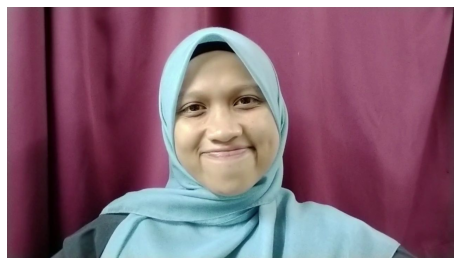

In [28]:
plotImages(image)

In [29]:

# get width and height of the image
h, w = image.shape[:2]
# gaussian blur kernel size depends on width and height of original image
kernel_width = (w // 7) | 1
kernel_height = (h // 7) | 1
# preprocess the image: resize and performs mean subtraction
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
# set the image into the input of the neural network
model.setInput(blob)
# perform inference and get the result
output = np.squeeze(model.forward())

In [30]:
for i in range(0, output.shape[0]):
    confidence = output[i, 2]
    # get the confidence
    # if confidence is above 40%, then blur the bounding box (face)
    if confidence > 0.4:
        # get the surrounding box cordinates and upscale them to original image
        box = output[i, 3:7] * np.array([w, h, w, h])
        # convert to integers
        start_x, start_y, end_x, end_y = box.astype(np.int)
        # get the face image
        face = image[start_y: end_y, start_x: end_x]
        # apply gaussian blur to this face
        face = cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)
        # put the blurred face into the original image
        image[start_y: end_y, start_x: end_x] = face

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


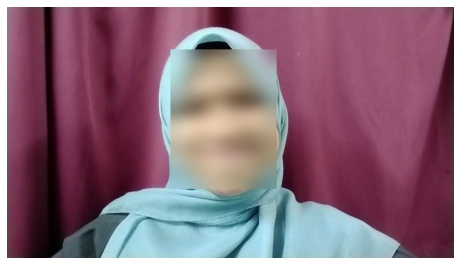

In [31]:
plotImages(image)